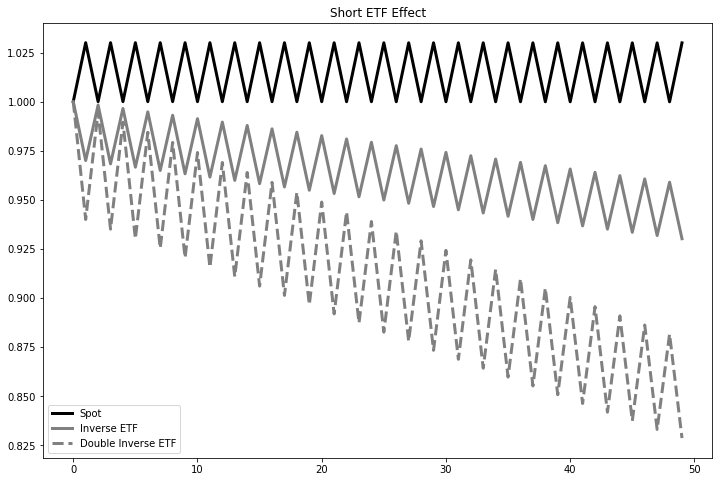

In [1]:
%matplotlib inline
import pandas as pd
import matplotlib.pyplot as plt

df = pd.DataFrame(index=range(50))

# Set odd days to +3%
df.loc[df.index % 2 == 1,'underlying_return'] = 0.03

# Set even days to -2.913%
df.loc[df.index % 2 == 0,'underlying_return'] = -0.02913

# Start at zero
df.iloc[0].loc['underlying_return'] = 0

# Calculate cumulative series
df['underlying_price'] = (df['underlying_return'] + 1).cumprod()

# Inverse ETF
df['short_return'] = df['underlying_return'] * -1
df['double_short_return'] = df['underlying_return'] * -2

# Double Inverse
df['short_price'] = (df['short_return'] + 1).cumprod()
df['double_short_price'] = (df['double_short_return'] + 1).cumprod()

# Make  new figure and set the size.
fig = plt.figure(figsize=(12, 8))

# The first subplot, planning for 3 plots high, 1 plot wide, this being the first.
ax = fig.add_subplot(111)
ax.set_title('Short ETF Effect')
ax.plot(df['underlying_price'], linestyle='-', label='Spot', linewidth=3.0, color='black')
ax.plot(df['short_price'], linestyle='-', label='Inverse ETF', linewidth=3.0, color = 'grey')
ax.plot(df['double_short_price'], linestyle='--', label='Double Inverse ETF', linewidth=3.0, color = 'grey')
ax.legend()
